#TTS

In [ ]:
! gdown https://drive.google.com/uc?id=1w4hsdWp34KmMvpUvHFsaMrRLNIR9ac9n
! unzip /content/ForwardTacotron

In [ ]:
cd /content/ForwardTacotron/

/content/drive/MyDrive/ForwardTacotron


In [ ]:
!apt-get install espeak-ng -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
The following NEW packages will be installed:
  espeak-ng espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 37 not upgraded.
Need to get 3,957 kB of archives.
After this operation, 10.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libpcaudio0 amd64 1.0-1 [6,536 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsonic0 amd64 0.2.0-6 [13.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 espeak-ng-data amd64 1.49.2+dfsg-1 [3,469 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libespeak-ng1 amd64 1.49.2+dfsg-1 [187 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak-ng amd64 1.49.2+dfsg-1 [282 kB]
Fetched 3,957 kB in 1s (3,294 kB/s)
S

In [ ]:
!apt-get install espeak -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,205 kB of archives.
After this operation, 2,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak-data amd64 1.48.04+dfsg-5 [934 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libespeak1 amd64 1.48.04+dfsg-5 [145 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak amd64 1.48.04+dfsg-5 [61.6 kB]
Fetched 1,205 kB in 1s (1,030 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 155660 files and directories 

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 3.6 MB 5.4 MB/s 
     |████████████████████████████████| 1.6 MB 44.4 MB/s 
     |████████████████████████████████| 212 kB 43.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 89 kB 7.9 MB/s 
     |████████████████████████████████| 66 kB 4.5 MB/s 
     |████████████████████████████████| 596 kB 40.2 MB/s 
     |████████████████████████████████| 235 kB 47.5 MB/s 
     |████████████████████████████████| 20.2 MB 1.4 MB/s 
     |████████████████████████████████| 195 kB 22.6 MB/s 
     |████████████████████████████████| 41 kB 595 kB/s 
  Created wheel for librosa: filename=librosa-0.7.2-py3-none-any.whl size=1612900 sha256=9f5202b981af437d3735103d954b260defdce0e2d90ab06f8aadb91f6ea8f443
  Stored in directory: /root/.cache/pip/wheels/18/9e/42/3224f85730f92fa2925f0b4fb6ef7f9c5431a64dfc77b95b39
  Created wheel for pyworld: filename=py

In [ ]:
!pip install indic_transliteration

     |████████████████████████████████| 120 kB 5.3 MB/s 
     |████████████████████████████████| 904 kB 25.6 MB/s 
     |████████████████████████████████| 662 kB 37.9 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20


# Steps to train and evalute a ForwardTacotron model


1.   Data preparation
2.   Training the Tacotron model
3.   Training the ForwardTacotron model
4.   Inference



# 1. Data Preparation

Change the parameters in the config.yaml file as per requirements. Given below are the parameters that are currently being used. 

Signal Processing Parameters:
> * Number of mel filters = 80
> * Minimum mel frequency = 0 Hz
> * Maximum mel frequency = 8000 Hz
> * Filter length = 1024
> * Hop length = 256
> * Window length = 1024
> * Window type = Hanning
> * Sample Rate = 22050 Hz


Text Processing:
> * Lanaguage = 'mr'
> * Cleaner Name = 'no_cleaner'
> * Use Phonemes = True

For the rest, default parameters can be used.













In [ ]:
#@title Phoneme Set

""" from https://github.com/keithito/tacotron """

'''
Defines the set of symbols used in text input to the model.

The default is a set of ASCII characters that works well for English or text that has been run through Unidecode. For other data, you can modify _characters. See TRAINING_DATA.md for details. '''

_pad = '_'
_punctuation = '!\'(),.:;? '
_special = '-'

# Phonemes
_vowels = 'iyɨʉɯuɪʏʊeøɘəɵɤoɛœɜɞʌɔæɐaɶɑɒᵻ'
_non_pulmonic_consonants = 'ʘɓǀɗǃʄǂɠǁʛ'
_pulmonic_consonants = 'pbtdʈɖcɟkɡqɢʔɴŋɲɳnɱmʙrʀⱱɾɽɸβfvθðszʃʒʂʐçʝxɣχʁħʕhɦɬɮʋɹɻjɰlɭʎʟ'
_suprasegmentals = 'ˈˌːˑ'
_other_symbols = 'ʍwɥʜʢʡɕʑɺɧ'
_diacrilics = 'ɚ˞ɫ'
_extra_phons = ['g', 'ɝ', '̃', '̍', '̥', '̩', '̯', '͡']  # some extra symbols that I found in from wiktionary ipa annotations

phonemes = list(
   _pad + _punctuation + _special + _vowels + _non_pulmonic_consonants
   + _pulmonic_consonants + _suprasegmentals + _other_symbols + _diacrilics) + _extra_phons

phonemes_set = set(phonemes)

In [ ]:
#@title Text Cleaner

import re
from typing import Union, Callable, Dict, Any, List

from phonemizer.phonemize import phonemize
from unidecode import unidecode
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

# Regular expression matching whitespace:
_whitespace_re = re.compile(r'\s+')

# List of (regular expression, replacement) pairs for abbreviations:
_abbreviations = [(re.compile('\\b%s\\.' % x[0], re.IGNORECASE), x[1]) for x in [
    ('mrs', 'misess'),
    ('mr', 'mister'),
    ('dr', 'doctor'),
    ('st', 'saint'),
    ('co', 'company'),
    ('jr', 'junior'),
    ('maj', 'major'),
    ('gen', 'general'),
    ('drs', 'doctors'),
    ('rev', 'reverend'),
    ('lt', 'lieutenant'),
    ('hon', 'honorable'),
    ('sgt', 'sergeant'),
    ('capt', 'captain'),
    ('esq', 'esquire'),
    ('ltd', 'limited'),
    ('col', 'colonel'),
    ('ft', 'fort'),
]]


def expand_abbreviations(text):
    for regex, replacement in _abbreviations:
        text = re.sub(regex, replacement, text)
    return text


def collapse_whitespace(text):
    return re.sub(_whitespace_re, ' ', text)


def no_cleaners(text):
    return text


def english_cleaners(text):
    text = unidecode(text)
    text = normalize_numbers(text)
    text = expand_abbreviations(text)
    return text


# def transliteration_cleaners(text):
#     '''Pipeline for non-English text that transliterates to ASCII.'''
#     text = convert_to_ascii(text)
#     text = lowercase(text)
#     text = collapse_whitespace(text)
#     return text


def indic_cleaners(text):
    text = normalize_numbers(text)
    text = transliterate(text, sanscript.DEVANAGARI, sanscript.ITRANS)
    text = collapse_whitespace(text)
    return text


def to_phonemes(text: str, lang: str) -> str:
    phonemes = phonemize(text,
                         language=lang,
                         backend='espeak',
                         strip=True,
                         preserve_punctuation=True,
                         with_stress=False,
                         njobs=1,
                         punctuation_marks=';:,.!?¡¿—…"«»“”()',
                         language_switch='remove-flags'
                         )
    phonemes = ''.join([p for p in phonemes if p in phonemes_set])
    return phonemes


class Cleaner:

    def __init__(self,
                 cleaner_name: str,
                 use_phonemes: bool,
                 lang: str) -> None:
        if cleaner_name == 'english_cleaners':
            self.clean_func = english_cleaners
        elif cleaner_name == 'no_cleaners':
            self.clean_func = no_cleaners
        elif cleaner_name == 'indic_cleaners':
            self.clean_func = indic_cleaners
        else:
            raise ValueError(f'Cleaner not supported: {cleaner_name}! '
                             f'Currently supported: [\'english_cleaners\', \'no_cleaners\']')
        self.use_phonemes = use_phonemes
        self.lang = lang

    def __call__(self, text: str) -> str:
        text = self.clean_func(text)
        if self.use_phonemes:
            text = to_phonemes(text, self.lang)
        text = collapse_whitespace(text)
        text = text.strip()
        return text

    @classmethod
    def from_config(cls, config: Dict[str, Any]) -> 'Cleaner':
        return Cleaner(
            cleaner_name=config['preprocessing']['cleaner_name'],
            use_phonemes=config['preprocessing']['use_phonemes'],
            lang=config['preprocessing']['language']
        )


In [ ]:
#@title Normalize Numbers

""" from https://github.com/keithito/tacotron """

import inflect
import re


_inflect = inflect.engine()
_comma_number_re = re.compile(r'([0-9][0-9\,]+[0-9])')
_decimal_number_re = re.compile(r'([0-9]+\.[0-9]+)')
_pounds_re = re.compile(r'£([0-9\,]*[0-9]+)')
_dollars_re = re.compile(r'\$([0-9\.\,]*[0-9]+)')
_ordinal_re = re.compile(r'[0-9]+(st|nd|rd|th)')
_number_re = re.compile(r'[0-9]+')


def _remove_commas(m):
  return m.group(1).replace(',', '')


def _expand_decimal_point(m):
  return m.group(1).replace('.', ' point ')


def _expand_dollars(m):
  match = m.group(1)
  parts = match.split('.')
  if len(parts) > 2:
    return match + ' dollars'  # Unexpected format
  dollars = int(parts[0]) if parts[0] else 0
  cents = int(parts[1]) if len(parts) > 1 and parts[1] else 0
  if dollars and cents:
    dollar_unit = 'dollar' if dollars == 1 else 'dollars'
    cent_unit = 'cent' if cents == 1 else 'cents'
    return '%s %s, %s %s' % (dollars, dollar_unit, cents, cent_unit)
  elif dollars:
    dollar_unit = 'dollar' if dollars == 1 else 'dollars'
    return '%s %s' % (dollars, dollar_unit)
  elif cents:
    cent_unit = 'cent' if cents == 1 else 'cents'
    return '%s %s' % (cents, cent_unit)
  else:
    return 'zero dollars'


def _expand_ordinal(m):
  return _inflect.number_to_words(m.group(0))


def _expand_number(m):
  num = int(m.group(0))
  if num > 1000 and num < 3000:
    if num == 2000:
      return 'two thousand'
    elif num > 2000 and num < 2010:
      return 'two thousand ' + _inflect.number_to_words(num % 100)
    elif num % 100 == 0:
      return _inflect.number_to_words(num // 100) + ' hundred'
    else:
      return _inflect.number_to_words(num, andword='', zero='oh', group=2).replace(', ', ' ')
  else:
    return _inflect.number_to_words(num, andword='')


def normalize_numbers(text):
  text = re.sub(_comma_number_re, _remove_commas, text)
  text = re.sub(_pounds_re, r'\1 pounds', text)
  text = re.sub(_dollars_re, _expand_dollars, text)
  text = re.sub(_decimal_number_re, _expand_decimal_point, text)
  text = re.sub(_ordinal_re, _expand_ordinal, text)
  text = re.sub(_number_re, _expand_number, text)
  return text


In [ ]:
text = "आज मी भाजी घेण्यासाठी बाजारात गेलो होतो."

In [ ]:
english_cleaners(text)

'aaj mii bhaajii ghennyaasaatthii baajaaraat gelo hoto.'

In [ ]:
indic_cleaners(text)

'Aja mI bhAjI gheNyAsAThI bAjArAta gelo hoto.'

In [ ]:
to_phonemes(text, 'mr')

'aːz mi baːɟi ɡeːɳjaːsaːʈi baːzaːɾaːt ɡeːloː hoːtoː.'

In [ ]:
!head -n 5 wav/metadata.csv

text6201|हरिश्चंद्रेश्र्वराचे मंदिर,   तळापासून या मंदिराची उंची, साधारणतः सोळा मीटर आहे.
text6202|जाऊन बेलोलखानास धरून चालविणे, आणि कोकणातून, मोरोपंत पेशव्यांनाही, हशमानिशी रवाना केले.
text6203|राजवाडाचे भग्रावशेष, भडंग नाथांचे मंदिर, या सर्व गोष्टी आहेत.
text6205|डावीकड च्या वाटेने वळल्यावर, दहा मिनिटांतच, आपण सीता गुहेपाशी येऊन पोहोचतो.
text6206|पदार्पण केले, आणि मराठी मुलूख ताब्यात घेण्यास, सुरवात केली.


> * We must ensure that the data is stored in the following format in the 'metadata.csv' file along with the wav files.

**Duration, Pitch, and Energy**
> * During the preprocessing stage, we also extract the ground truth pitch and energy information along with the duration
> * Models similar to the duration predictor are used to predict the pitch and energy
> * The L1 loss corresponding to these are also included in the final loss

> * The following command runs the preprocessing pipeline and performs all the steps discussed above

In [ ]:
!python preprocess.py --path wav --num_workers 2

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit

47 .wav files found in "wav"
Using 47 wav files that are indexed in metafile.

+-------------+-----------+--------+------------+-----------+----------------+
| Sample Rate | Bit Depth | Mu Law | Hop Length | CPU Usage | Nu

In [ ]:
with open('data/text_dict.pkl', 'rb') as f:
    text_dict = pickle.load(f)

list(text_dict.items())[:5]

[('text6211',
  'mɑːɾɚɹ aɪð, ɑːt viː bɑːhɚ, fɑːɹɹɪkɹɪɑː ɛnnɑː dʒɑːpnɪɑːsɑːtθɪaɪ, biːɑːɹtiːeɪtʃ kɛlɛl ɑːhɪt.'),
 ('text6212',
  'fɪɪnɪkʃuːŋ ɡɹiː ɛnɛnɛndiːdiː kiː ɛnnɪɪŋ keɪdiːdiːiː dʒɑːɪk ɛn ɛmeɪtʃɛnɛndʒeɪiː, ɛmdiːhaɪ diːdiːoʊ ɛndʒiːɑːɹ ɹɑː əŋɡɑː ɑːlɑː ɛndiːduːn, pʌd dʒɑːv ɛn lɑːɡt ɛn.'),
 ('text6214',
  'ɛn ɛntiːɑːɹ, pɹʌdənʃɪɪl tiːtiːoʊ ɛnviːɑːɹɹɛs nɑːvɑːsɪɑː, boʊ ɛnɛstiːtiːɛnsaɪɑː ɛkɑː juː ɛnsiː ɪmɑːɹɾɪɪtuːn, ɑːdʒuːbɑːdʒuːkɑː ɛndʒɑːɹɹɑː pɑːhɪlɑː.'),
 ('text6213',
  'taɪɑːtuːn lɪft, æmɚɹɪkən lɑːkɑː ɛnsaɪɑː bɑːsɛt niː, ɑːplɪɑːlɑː kɑːəl pɹaɪ ɛntiː dʒɑːɾɑː jɛt ɛn.'),
 ('text6215',
  'aɪð suː ɛndiːɑːɹ bɑːɡ biːdʒɪɪkɑː kɛlɪɑːz, piː ɛndiːdiːeɪtʃɑːɹpuːɚ saɪɑː saʊ ɛndɹaɪɑːt, nɪʃsɪtk biːeɪtʃɑːɹ piːdiːdɛl.')]

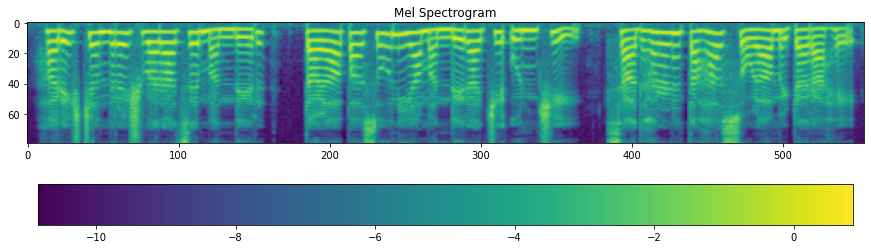

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mel = np.load('data/mel/text6201.npy')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(111)
ax.set_title('Mel Spectrogram')
plt.imshow(mel)
plt.colorbar(orientation='horizontal')
plt.show()

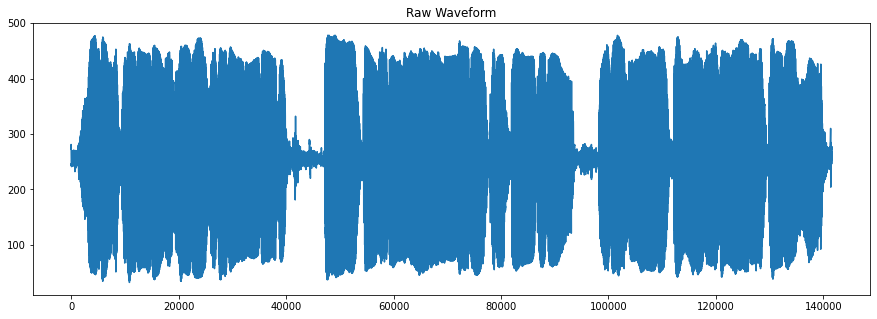

In [ ]:
quant = np.load('data/quant/text6201.npy')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(111)
ax.set_title('Raw Waveform')
plt.plot(quant)
plt.show()

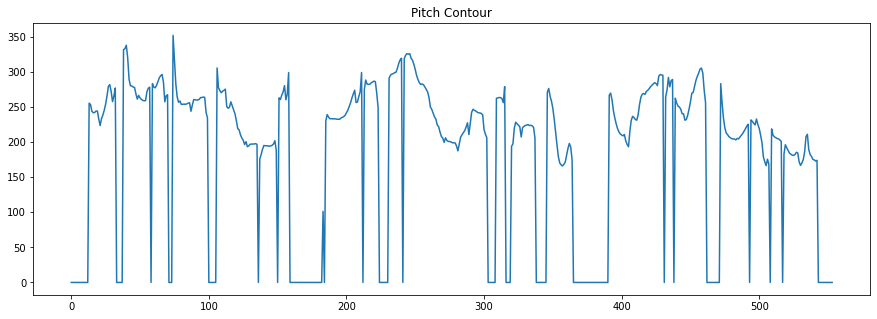

In [ ]:
pitch = np.load('data/raw_pitch/text6201.npy')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(111)
ax.set_title('Pitch Contour')
plt.plot(pitch)
plt.show()

# Training the Tacotron model

> * Next, we need to train the tacotron model for training the Duration Predictor in ForwardTacotron
> * The durations are extracted from the attention alignments using dijkstras algorithm
> * After training the Tacotron model, we will obtain the attention alignments mapping the mel spectrogram frames with the corresponding phonemes
> * Using these mapping, we will find the phoneme energy and pitch which will also be predicted by the ForwardTacotron model

In [ ]:
def create_align_features(model: Tacotron,
                          train_set: DataLoader,
                          val_set: DataLoader,
                          paths: Paths,
                          pitch_max_freq: float) -> None:

    model.eval()
    device = next(model.parameters()).device  # use same device as model parameters
    iters = len(val_set) + len(train_set)
    dataset = itertools.chain(train_set, val_set)
    att_score_dict = {}

    if config['preprocessing']['extract_durations_with_dijkstra']:
        print('Extracting durations using dijkstra...')
        dur_extraction_func = extract_durations_with_dijkstra
    else:
        print('Extracting durations using attention peak counts...')
        dur_extraction_func = extract_durations_per_count

    for i, batch in enumerate(dataset, 1):
        batch = to_device(batch, device=device)
        with torch.no_grad():
            _, _, att_batch = model(batch['x'], batch['mel'])

        align_score, sharp_score = attention_score(att_batch, batch['mel_len'], r=1)
        att_batch = np_now(att_batch)
        seq, att, mel_len, item_id = batch['x'][0], att_batch[0], batch['mel_len'][0], batch['item_id'][0]
        align_score, sharp_score = float(align_score[0]), float(sharp_score[0])
        att_score_dict[item_id] = (align_score, sharp_score)
        
        durs = dur_extraction_func(seq, att, mel_len)
        if np.sum(durs) != mel_len:
            print(f'WARNINNG: Sum of durations did not match mel length for item {item_id}!')
        np.save(str(paths.alg / f'{item_id}.npy'), durs, allow_pickle=False)
        bar = progbar(i, iters)
        msg = f'{bar} {i}/{iters} Files '
        stream(msg)
    
    pickle_binary(att_score_dict, paths.data / 'att_score_dict.pkl')
    print('Extracting Pitch Values...')
    
    extract_pitch_energy(save_path_pitch=paths.phon_pitch,
                         save_path_energy=paths.phon_energy,
                         pitch_max_freq=pitch_max_freq)

In [ ]:
!python train_tacotron.py

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using device: cuda

Initialising Tacotron Model...

+----------------+------------+---------------+------------------+
| Steps with r=1 | Batch Size | Learning Rate | Outputs/Step (r) |
+----------------+------------+------

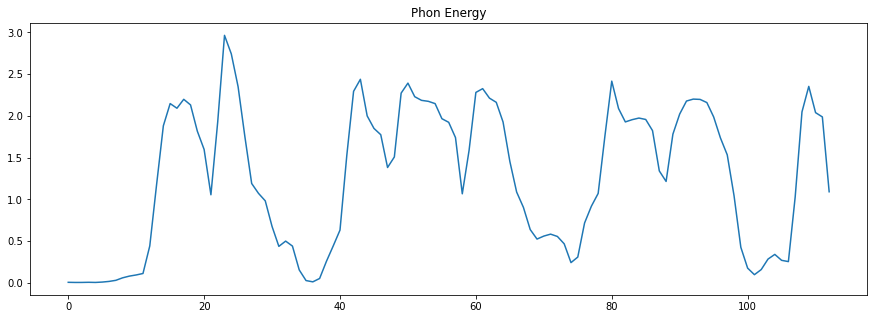

In [ ]:
pe = np.load('data/phon_energy/text6201.npy')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(111)
ax.set_title('Phon Energy')
plt.plot(pe)
plt.show()

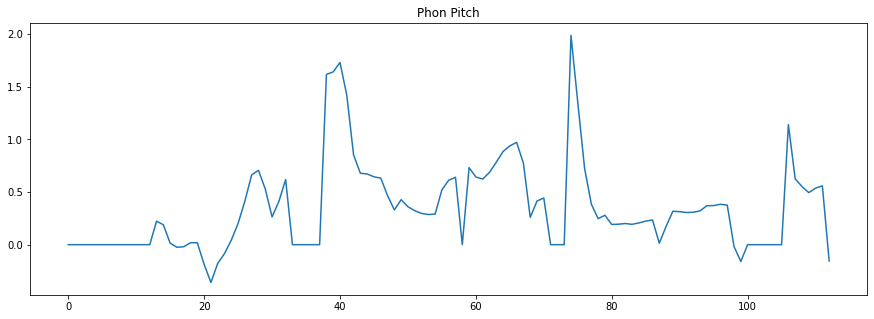

In [ ]:
pp = np.load('data/phon_pitch/text6201.npy')

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(111)
ax.set_title('Phon Pitch')
plt.plot(pp)
plt.show()

# Training the ForwardTacotron model

> * On training the tacotron model, we obtain the attention maps, and all these maps are automatically scored based on sharpness and extent of alignment
> * We remove the samples where these criteria fall below certain threshold
> * In this case, since we are training on small dataset, all attention maps are bad, hence we will remove this condition

In [ ]:
!python train_forward.py

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using device: cuda

Initialized tts model: ForwardTacotron, num params: 24509235

+----------+------------+---------------+
|  Steps   | Batch Size | Learning Rate |
+----------+------------+---------------+
| 0k Steps |   

# Inference

> * During inference, we use the ForwardTacotron model to generate the mel spectrograms corresponding to the expected speech output
> * These mel spectrograms are then converted to raw audio waveforms using vocoder, and we will use pre-trained waveglow in our case

In [ ]:
!python gen_forward.py --input_text 'मी आयआयटी बॉम्बेचा विद्यार्थी आहे जो आता ७० वर्षांचा आहे.' --checkpoint ./model_outputs/forwardtacotron_mr.pt melgan

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Loading tts checkpoint ./model_outputs/forwardtacotron_mr.pt
Initialized tts model: ForwardTacotron, num params: 24509235
Restored model with step 40040
Using device: cuda

+------------------+--------------+
| Forward Taco

In [ ]:
import torch

waveglow = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_waveglow', model_math='fp32')
waveglow = waveglow.to('cuda')
waveglow.eval()

mel_output = torch.load('model_outputs/1_forward_40k_alpha1.0_amp1.0_melgan.mel').to('cuda')

with torch.no_grad():
    audio = waveglow.infer(mel_output, sigma=0.666)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [ ]:
from IPython.display import Audio

Audio(audio.cpu().numpy(), rate=22050)

# Temporary

In [ ]:
from pathlib import Path
import numpy as np
import torch

from models.forward_tacotron import ForwardTacotron
from utils.dsp import DSP
from utils.text.cleaners import Cleaner
from utils.text.tokenizer import Tokenizer

import IPython.display as ipd

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
text = "नमस्कार, माझे नाव श्याम ठोंबरे आहे, आयआयटी बॉम्बेचा विद्यार्थी आहे, आणि डेटा सायन्स क्षेत्रात एक महान आणि यशस्वी वैज्ञानिक बनण्याची माझी इच्छा आहे."

In [ ]:
def interactive_tts_mr(text, checkpoint_path):
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    config = checkpoint['config']

    tts_model = ForwardTacotron.from_config(config)
    tts_model.load_state_dict(checkpoint['model'])
    tts_model.to(device)
    tts_model.eval()

    waveglow = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_waveglow', model_math='fp32')
    waveglow = waveglow.to('cuda')
    waveglow.eval()

    dsp = DSP.from_config(config)
    cleaner = Cleaner.from_config(config)
    tokenizer = Tokenizer()

    pitch_function = lambda x: x
    energy_function = lambda x: x

    x = cleaner(text)
    x = tokenizer(x)
    x = torch.as_tensor(x, dtype=torch.long, device=device).unsqueeze(0)

    gen = tts_model.generate(x=x,
                              alpha=1.,
                              pitch_function=pitch_function,
                              energy_function=energy_function)

    mel_output = gen['mel_post']

    with torch.no_grad():
        audio = waveglow.infer(mel_output, sigma=0.666)

    return audio[0].data.float().cpu().numpy()

In [ ]:
checkpoint_path = "./model_outputs/forwardtacotron_mr.pt"

speech = interactive_tts_mr(text, checkpoint_path)
ipd.Audio(speech, rate=22050)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Embedding
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence, pad_sequence

from phonemizer.phonemize import phonemize
from unidecode import unidecode
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

import sys
sys.path.append('waveglow/')

import re
import math
import struct
import librosa
import webrtcvad
import numpy as np
from pathlib import Path
import IPython.display as ipd
from scipy.ndimage import binary_dilation
from typing import Union, Callable, Dict, Any, List

In [ ]:
#@title Tokenizer

class Tokenizer:

    def __init__(self) -> None:
        self.symbol_to_id = {s: i for i, s in enumerate(phonemes)}
        self.id_to_symbol = {i: s for i, s in enumerate(phonemes)}

    def __call__(self, text: str) -> List[int]:
        return [self.symbol_to_id[t] for t in text if t in self.symbol_to_id]

    def decode(self, sequence: List[int]) -> str:
        text = [self.id_to_symbol[s] for s in sequence if s in self.id_to_symbol]
        return ''.join(text)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
text = "नमस्कार, माझे नाव श्याम ठोंबरे आहे, आयआयटी बॉम्बेचा विद्यार्थी आहे, आणि डेटा सायन्स क्षेत्रात एक महान आणि यशस्वी वैज्ञानिक बनण्याची माझी इच्छा आहे."

In [ ]:
# Loading TTS model

checkpoint_path = ""

checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
config = checkpoint['config']

tts_model = ForwardTacotron.from_config(config)
tts_model.load_state_dict(checkpoint['model'])
tts_model.to(device)
tts_model.eval()

In [ ]:
# Loading Vocoder model

waveglow_path = "waveglow/waveglow_256channels_universal_v5.pt"
waveglow = torch.load(waveglow_path)['model']
waveglow.cuda().eval()
for k in waveglow.convinv:
    k.float()

In [ ]:
dsp = DSP.from_config(config)
cleaner = Cleaner.from_config(config)
tokenizer = Tokenizer()

pitch_function = lambda x: x
energy_function = lambda x: x

In [ ]:
x = text
x = cleaner(x)
x = tokenizer(x)
x = torch.as_tensor(x, dtype=torch.long, device=device).unsqueeze(0)

gen = tts_model.generate(x=x,
                          alpha=1.,
                          pitch_function=pitch_function,
                          energy_function=energy_function)

mel_output = gen['mel_post']

In [ ]:
with torch.no_grad():
    audio = waveglow.infer(mel_output, sigma=0.666)

ipd.Audio(audio[0].data.float().cpu().numpy(), rate=22050)